In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn


In [2]:
df = pd.read_csv("Downloads/Datasets (1)e7e7eed/Datasets/Survey data_Inflight Satisfaction Score.csv")

In [3]:
df.head() 

,flight_number,origin_station_code,destination_station_code,record_locator,scheduled_departure_date,question_text,score,satisfaction_type,driver_sub_group1,driver_sub_group2,...,equipment_type_code,ua_uax,actual_flown_miles,haul_type,departure_gate,arrival_gate,international_domestic_indicator,response_group,media_provider,hub_spoke
0,3802,MKX,ORX,CYXXJJ,9/1/2022,How satisfied were you with the food & beverag...,2,Dissatisfied,food & beverage,food and beverage satisfaction,...,CRZ,UAX,67,Short,C12,F10,Domestic,non-member,NaN,spoke departure
1,4645,COX,DEX,DRXXMH,9/1/2022,How satisfied were you with the food & beverag...,5,Satisfied,food & beverage,food and beverage satisfaction,...,E75,UAX,72,Short,5,B60,Domestic,member,GOGO,spoke departure
2,5236,COX,DEX,DEXXS1,9/1/2022,How satisfied were you with the food & beverag...,5,Satisfied,food & beverage,food and beverage satisfaction,...,E75,UAX,72,Short,7,A71,Domestic,member,GOGO,spoke departure
3,4686,DEX,COX,PXXXLH,9/1/2022,How satisfied were you with the food & beverag...,3,Dissatisfied,food & beverage,food and beverage satisfaction,...,CRJ,UAX,72,Short,B82,5,Domestic,member,NaN,hub departure
4,671,DEX,COX,KZXXH5,9/1/2022,How satisfied were you with the food & beverag...,5,Satisfied,food & beverage,food and beverage satisfaction,...,19F,UA,72,Short,B24,3,Domestic,member,PANASONIC,hub departure


C:\Users\Anish\AppData\Local\Temp\ipykernel_16916\3072859631.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


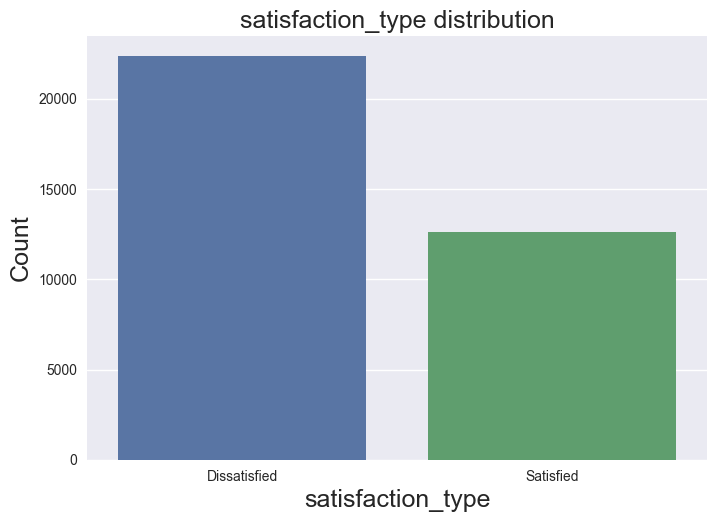

In [4]:
plt.style.use('seaborn')
sn.countplot(data=df,x='satisfaction_type')
plt.xlabel('satisfaction_type',fontsize=18)
plt.ylabel('Count',fontsize=18)
plt.title('satisfaction_type distribution',fontsize=18)
plt.show()

# Now considering only satisfied customers

In [5]:
df = df[df['satisfaction_type'] == 'Satisfied']
df = df.reset_index() 
total_satisfied = len(df)

In [6]:
print(total_satisfied)

12610


In [7]:
haul = []
for i in ('Short' , 'Medium' , 'Long'):
    haul.append(len(df[df['haul_type'] == i]))
print(haul)

[1415, 8003, 3192]


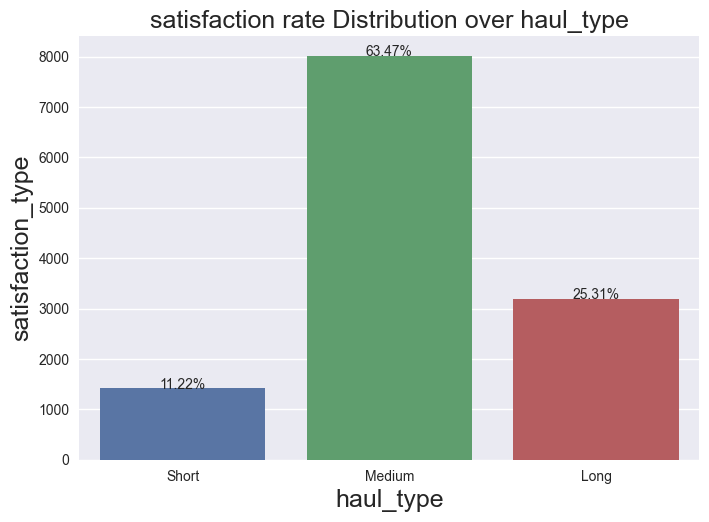

In [8]:
sn.countplot(data=df,x='haul_type')
plt.xlabel('haul_type',fontsize=18)
plt.ylabel('satisfaction_type',fontsize=18)
plt.title('satisfaction rate Distribution over haul_type',fontsize=18)
for i in range(0,len(haul)):
    x = round((haul[i]/total_satisfied)*100,2)
    plt.text(i,haul[i],str(x)+'%',ha='center')
plt.show()

In [9]:
idi = []
for i in ('Domestic' , 'International'):
    idi.append(len(df[df['international_domestic_indicator'] == i]))

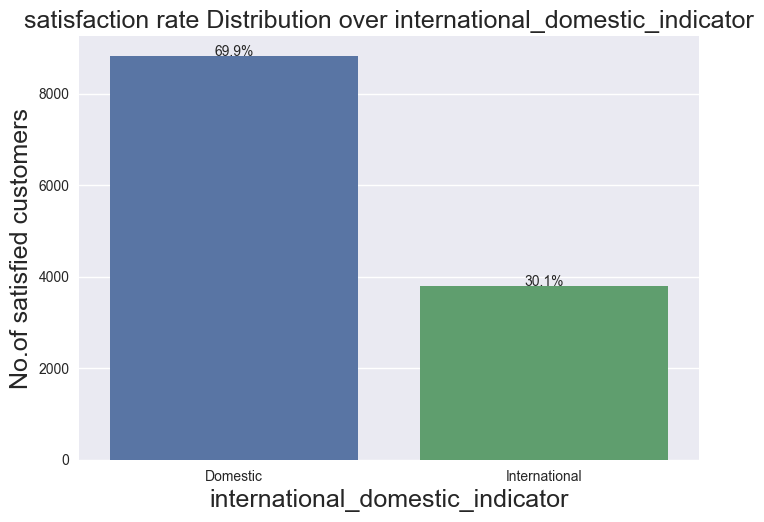

In [10]:

sn.countplot(data=df,x='international_domestic_indicator')
plt.xlabel('international_domestic_indicator',fontsize=18)
plt.ylabel('No.of satisfied customers',fontsize=18)
plt.title('satisfaction rate Distribution over international_domestic_indicator',fontsize=18)
for i in range(0,len(idi)):
    x = round((idi[i]/total_satisfied)*100,2)
    plt.text(i,idi[i],str(x)+'%',ha='center')

plt.show()

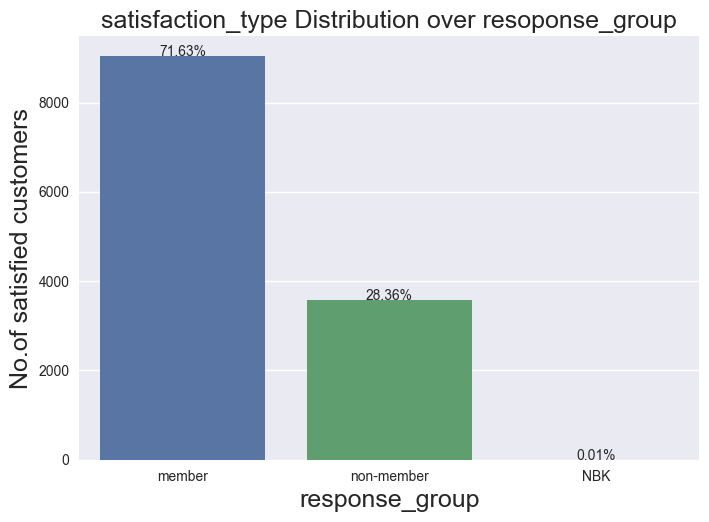

In [11]:
rg = list(df.response_group.value_counts())
sn.countplot(data=df,x='response_group')
plt.xlabel('response_group',fontsize=18)
plt.ylabel('No.of satisfied customers',fontsize=18)
plt.title('satisfaction_type Distribution over resoponse_group',fontsize=18)
for i in range(0,len(rg)):
    x = round((rg[i]/total_satisfied)*100,2)
    plt.text(i,rg[i],str(x)+'%',ha='center')

plt.show()

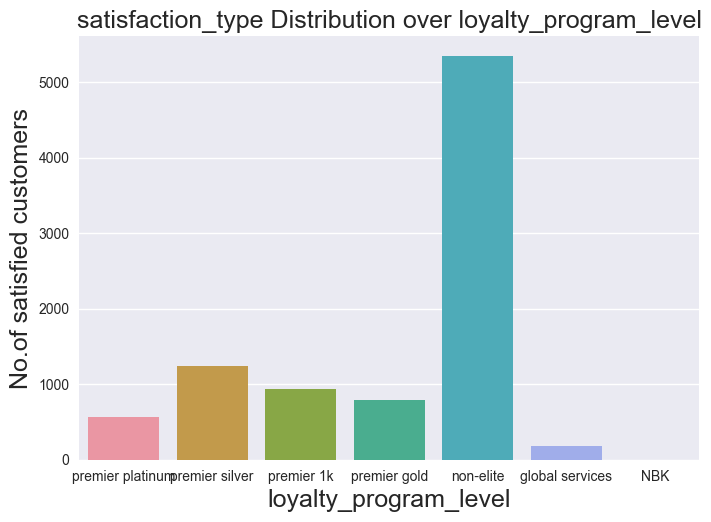

In [12]:
sn.countplot(data=df,x='loyalty_program_level')
plt.xlabel('loyalty_program_level',fontsize=18)
plt.ylabel('No.of satisfied customers',fontsize=18)
plt.title('satisfaction_type Distribution over loyalty_program_level',fontsize=18)

plt.show()

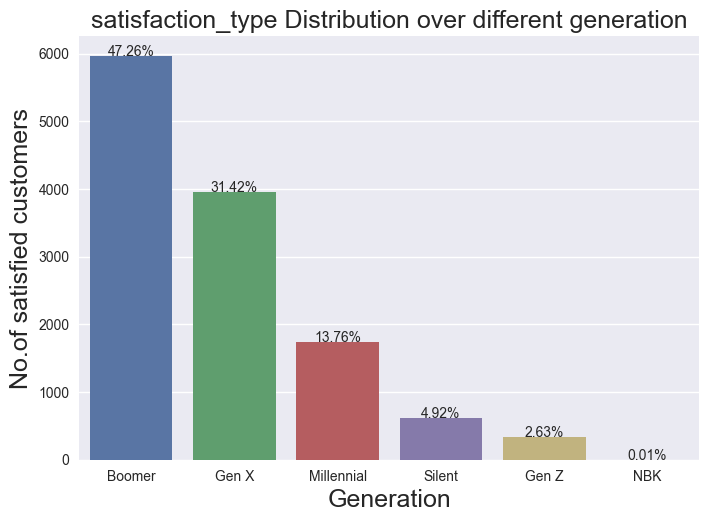

In [13]:
gen = list(df.generation.value_counts())
sn.countplot(data=df,x='generation')
plt.xlabel('Generation',fontsize=18)
plt.ylabel('No.of satisfied customers',fontsize=18)
plt.title('satisfaction_type Distribution over different generation',fontsize=18)
for i in range(0,len(gen)):
    x = round((gen[i]/total_satisfied)*100,2)
    plt.text(i,gen[i],str(x)+'%',ha='center')

plt.show()

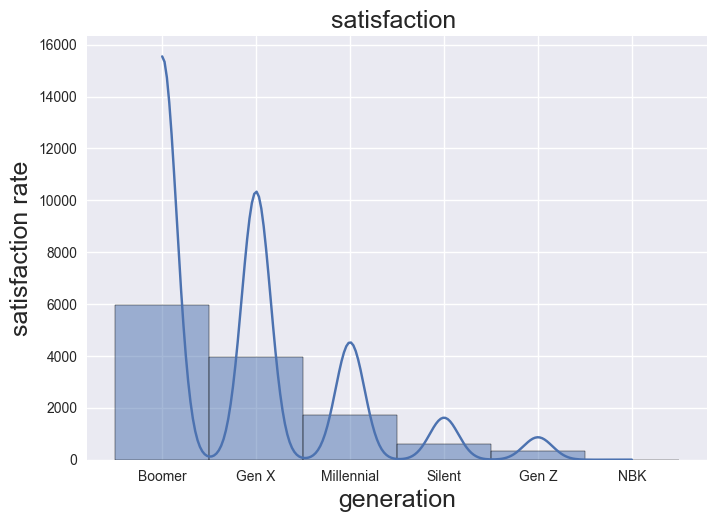

In [14]:
sn.histplot(data=df,x='generation',kde=True)
plt.xlabel('generation', fontsize=18)
plt.ylabel('satisfaction rate',fontsize=18)
plt.title('satisfaction ',fontsize=18)
plt.show()

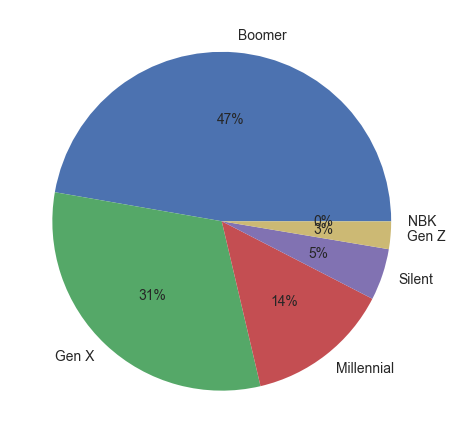

In [22]:
gen = df['generation'].unique() 
plt.pie(df['generation'].value_counts(),labels=gen,
        autopct='%.0f%%')

plt.show()

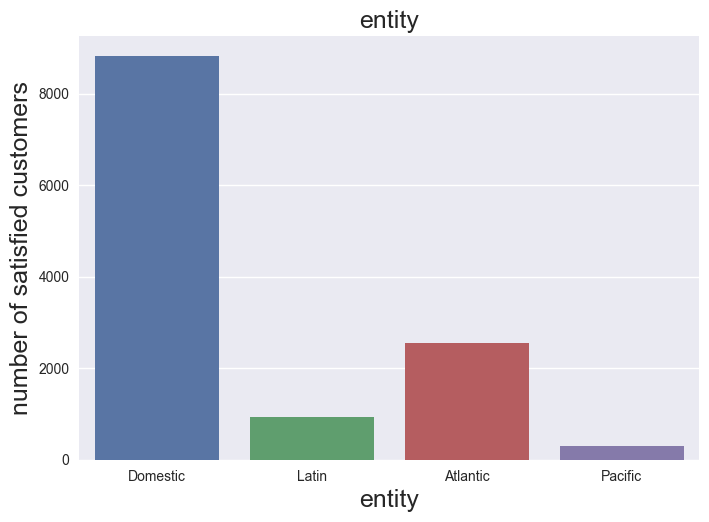

In [23]:

sn.countplot(data=df,x='entity')
plt.xlabel('entity',fontsize=18)
plt.ylabel('number of satisfied customers',fontsize=18)
plt.title('entity',fontsize=18)

plt.show()

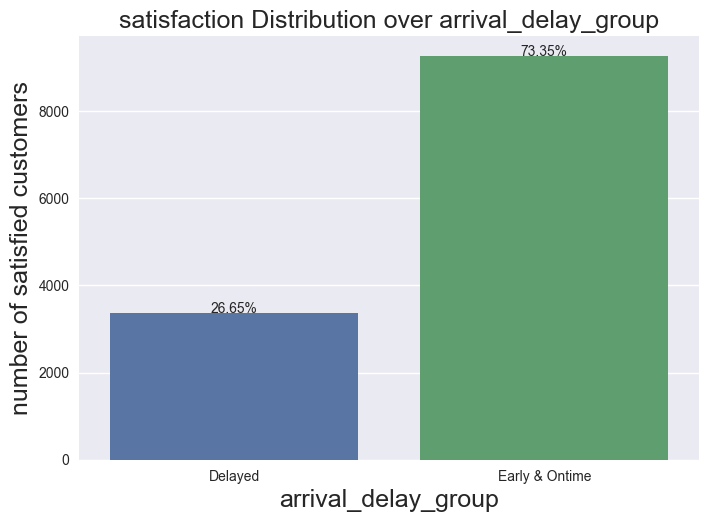

In [24]:
adg = list(df.arrival_delay_group.value_counts())
sn.countplot(data=df,x='arrival_delay_group')
plt.xlabel('arrival_delay_group',fontsize=18)
plt.ylabel('number of satisfied customers',fontsize=18)
plt.title('satisfaction Distribution over arrival_delay_group',fontsize=18)
for i in range(0,2):
    x = round((adg[i]/total_satisfied)*100,2)
    plt.text(1-i,adg[i],str(x)+'%',ha='center')

plt.show()

In [18]:
df['cabin_name'].fillna("Bussiness", inplace = True)

['Bussiness' 'Economy' 'Economy Plus']


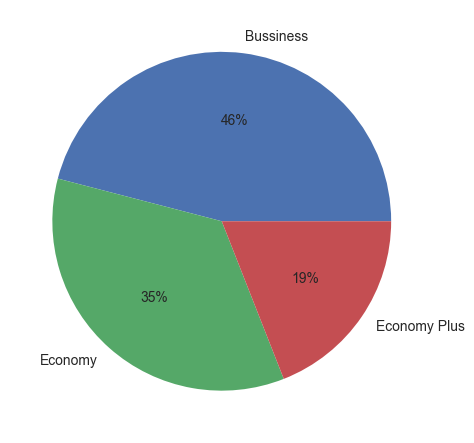

In [25]:
lab = df['cabin_name'].unique()
print(lab)
plt.pie(df['cabin_name'].value_counts(),labels=lab,
        autopct='%.0f%%')

plt.show()

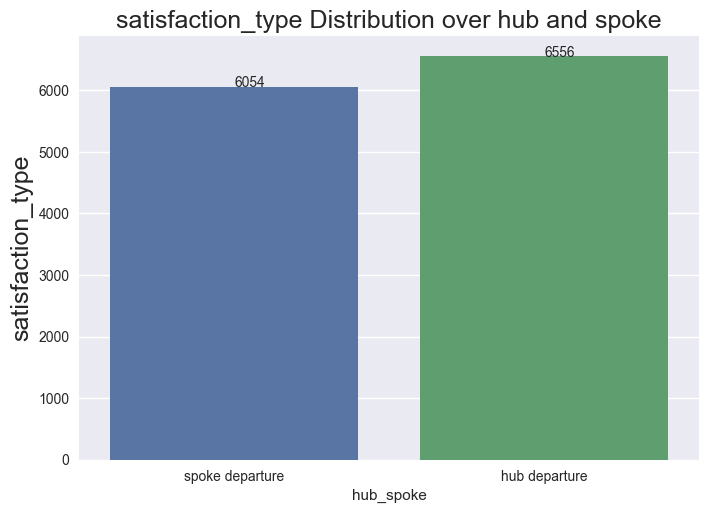

In [26]:
sn.countplot(data=df,x='hub_spoke')

plt.ylabel('satisfaction_type',fontsize=18)
plt.title('satisfaction_type Distribution over hub and spoke',fontsize=18)
j = 1 
for i in df.hub_spoke.value_counts():
    plt.text(j , i, str(i))
    j-=1

plt.show()

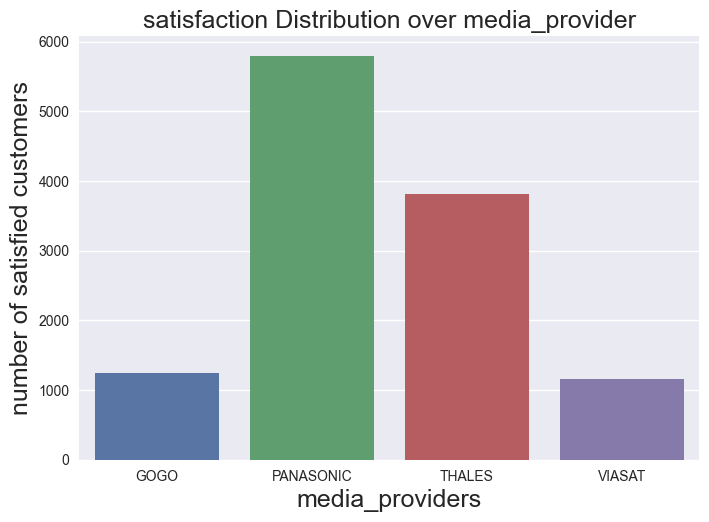

In [27]:
sn.countplot(data=df,x='media_provider')
plt.xlabel('media_providers',fontsize=18)
plt.ylabel('number of satisfied customers',fontsize=18)
plt.title('satisfaction Distribution over media_provider',fontsize=18)
plt.show()